Jairo El Yazidi Ríos


Oriol Gavin Gauxachs
# Práctica APA 2022-2023
*Notebook* que contiene la ejecución de todos los modelos y la obtención de resultados, gráficas y tablas que luego explicamos en el informe.

La ejecución completa puede tardar unos minutos.

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install dtreeviz==1.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 KB 5.4 MB/s eta 0:00:00


In [ ]:
import jax.numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import sklearn
from yellowbrick.regressor import prediction_error, AlphaSelection, residuals_plot
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from skopt import BayesSearchCV
from sklearn.inspection import permutation_importance
from dtreeviz.trees import dtreeviz
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data = pd.read_csv("/content/sample_data/student-mat.csv", delimiter=';', header=0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Descripción estadística básica

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocesamiento de los datos

### Valores perdidos o faltantes

In [ ]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Por suerte, en este caso no hay, si no, habría que, o bien eliminar la variable si eran demasiados valores perdidos, o bien sustituirlos por un valor arbitrario como la media.

### Valores extremos o *outliers*

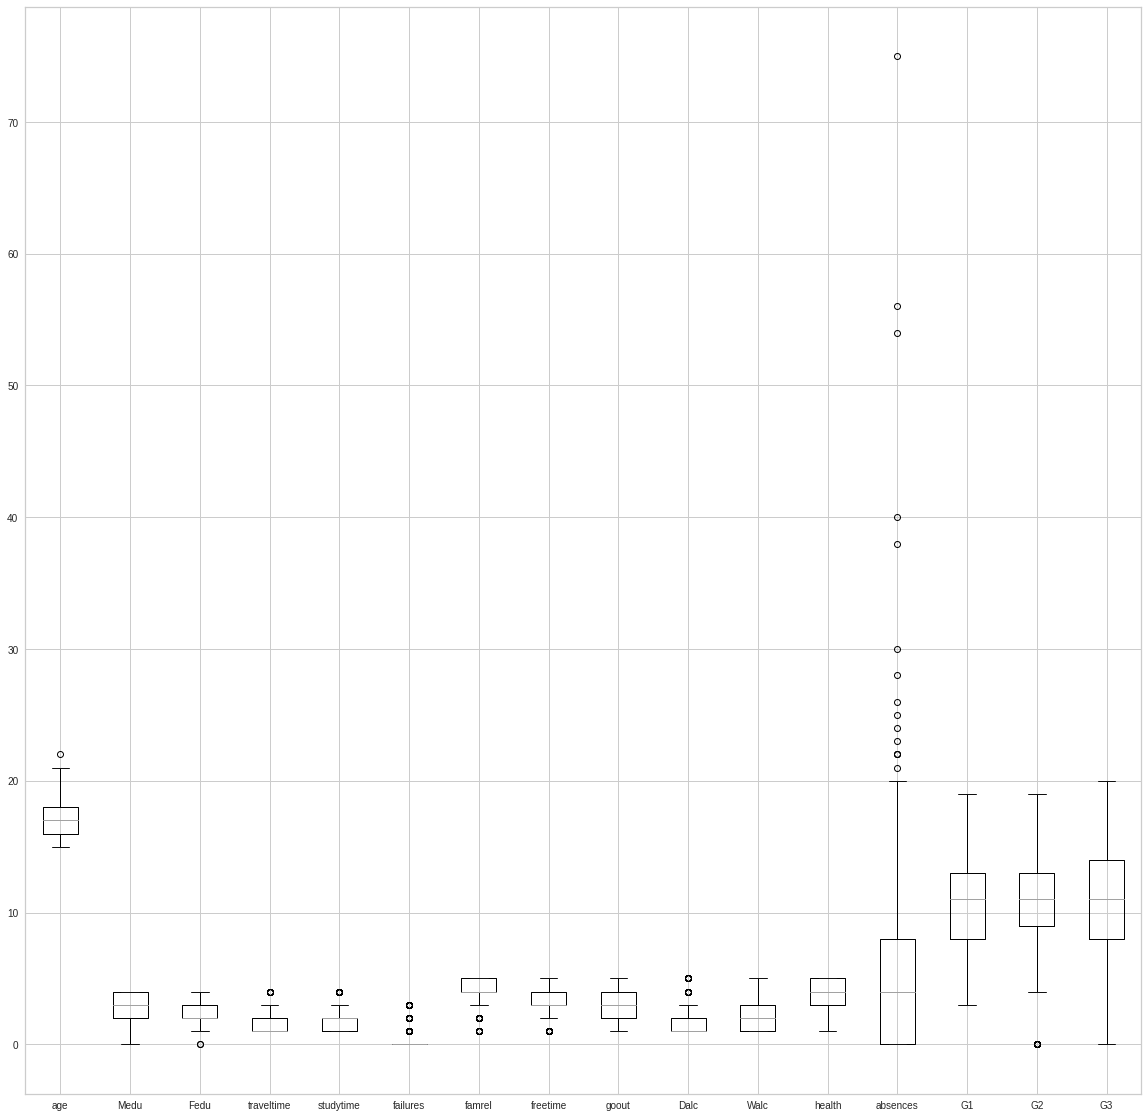

In [ ]:
fig, ax = plt.subplots(figsize=(20,20));
data.boxplot();

No parece haber muchos valores extremos. Al final muchas variables son numéricas pero equivalentes a categóricas, así que acaban siendo valores en un rango pequeño. En las variables continuas como las ausencias del alumno, es normal que el *boxplot* no revele nada.

### Transformación de variables categóricas

In [ ]:
categorical_columns = list(data.dtypes[data.dtypes == 'O'].index.values)
print("Variables categóricas " + str(categorical_columns))

Variables categóricas ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


One-hot enconding

In [ ]:
data = pd.get_dummies(data, prefix=categorical_columns, columns=categorical_columns)
data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [ ]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


### Obtención de datos de estudiantes particulares

In [ ]:
Student1 = data.loc[387, data.columns != 'G3']
Student1 = Student1.drop(['G2'])
S1 = Student1.to_numpy().reshape(1,-1)

In [ ]:
Student2 = data.loc[2, data.columns != 'G3']
Student2 = Student2.drop(['G2'])
S2 = Student2.to_numpy().reshape(1,-1)

In [ ]:
Student3 = data.loc[135, data.columns != 'G3']
Student3 = Student3.drop(['G2'])
S3 = Student3.to_numpy().reshape(1,-1)

In [ ]:
Student4 = data.loc[293, data.columns != 'G3']
Student4 = Student4.drop(['G2'])
S4 = Student4.to_numpy().reshape(1,-1)

## Visualización de los datos

En el primer documento de entrega ya hicimos las comparaciones necesarias de cada variable con la variable objetivo, así que no lo repetiremos aquí. Lo que sí llevaremos a cabo es el PCA para poder visualizar los datos con dimensionalidad reducida.

In [ ]:
X = data.loc[:, data.columns != 'G3']
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((276, 58), (119, 58))

In [ ]:
scaler = MinMaxScaler()
X_train_st = X_train.copy()
X_test_st = X_test.copy()

X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [ ]:
X_train_st = pd.DataFrame(X_train_st,columns = X_train.columns)
X_test_st = pd.DataFrame(X_test_st,columns = X_test.columns)

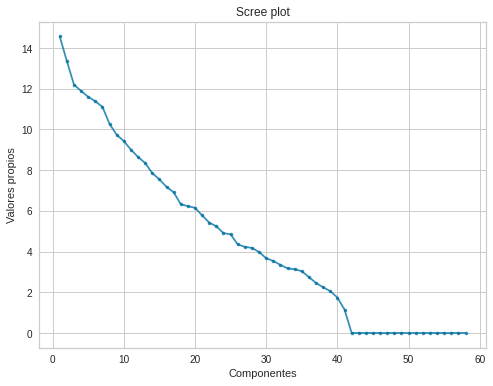

In [ ]:
pca = PCA().fit(X_train_st)  

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.singular_values_ )+1), pca.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Valores propios');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

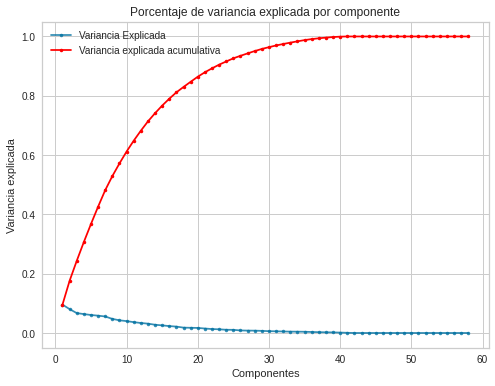

In [ ]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

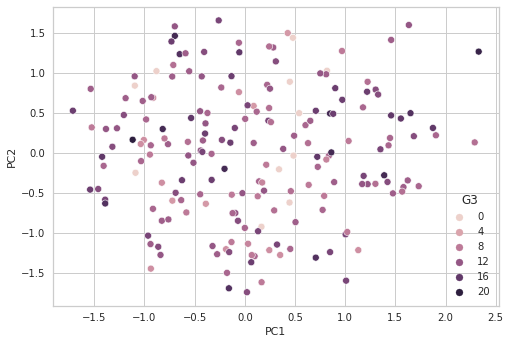

In [ ]:
train_principal_components = pca.transform(X_train_st[X.columns])
X_train_st[['PC1','PC2','PC3']] = train_principal_components[:,:3]

sns.scatterplot(x='PC1', y='PC2', hue=y_train, data=X_train_st)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X_train_st, x='PC1', y='PC2', z='PC3',
              color=y_train)
fig.show()

## Modelos lineales

### Regresión Lineal
Empezaremos con la regresión lineal, pero lo haremos con tres conjuntos de datos variando la presencia de las variables G1 y G2.

#### Versión con G1 y G2

In [ ]:
lr = LinearRegression();
lr.fit(X_train,y_train);
print('Coeficientes: \n', lr.coef_)

Coeficientes: 
 [-1.90773926e-01  1.46632517e-01 -9.39428935e-02  9.68663696e-02
  6.88192300e-02  7.43377154e-02  1.46739184e-01  3.91301259e-02
  4.95263586e-03 -1.99457970e-01  1.77987660e-01  7.25721248e-02
  5.09687976e-02  1.52220293e-01  9.48830427e-01 -3.33759623e+11
 -3.33759623e+11  7.37584301e+09  7.37584301e+09  1.20587272e+10
  1.20587272e+10 -2.80457867e+11 -2.80457867e+11 -8.22945819e+11
 -8.22945819e+11  7.96226449e+11  7.96226449e+11  7.96226449e+11
  7.96226449e+11  7.96226449e+11 -7.70610568e+10 -7.70610568e+10
 -7.70610568e+10 -7.70610568e+10 -7.70610568e+10  1.75514571e+11
  1.75514571e+11  1.75514571e+11  1.75514571e+11 -7.32986818e+11
 -7.32986818e+11 -7.32986818e+11  1.28453838e+11  1.28453838e+11
 -8.52465446e+10 -8.52465446e+10  5.18143401e+11  5.18143401e+11
  1.19820804e+12  1.19820804e+12 -6.07317133e+11 -6.07317133e+11
  8.31554124e+10  8.31554124e+10  4.40145450e+11  4.40145450e+11
 -2.67778735e+11 -2.67778735e+11]


In [ ]:
print("Puntuación de validación cruzada:", np.mean(cross_val_score(lr, X_train, y_train, cv=10)))

Puntuación de validación cruzada: 0.7989118


In [ ]:
print("Puntuación de R2:", r2_score(y_test, lr.predict(X_test)))

Puntuación de R2: 0.7886318727371656


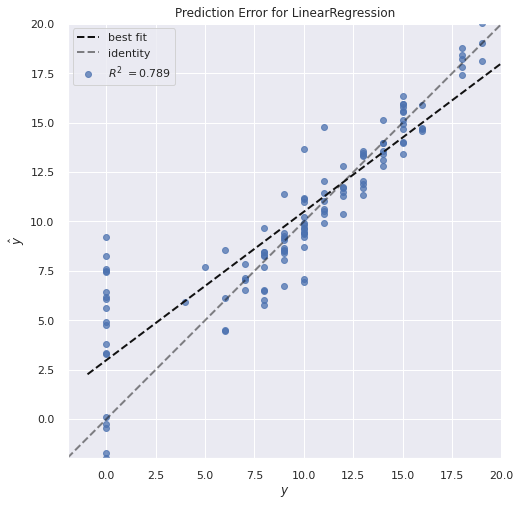

In [ ]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
LRresult = (result.summary().tables[1]).as_html()
results = pd.read_html(LRresult, header=0, index_col=0)[0]
r = results['coef'].drop('const')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<BarContainer object of 58 artists>

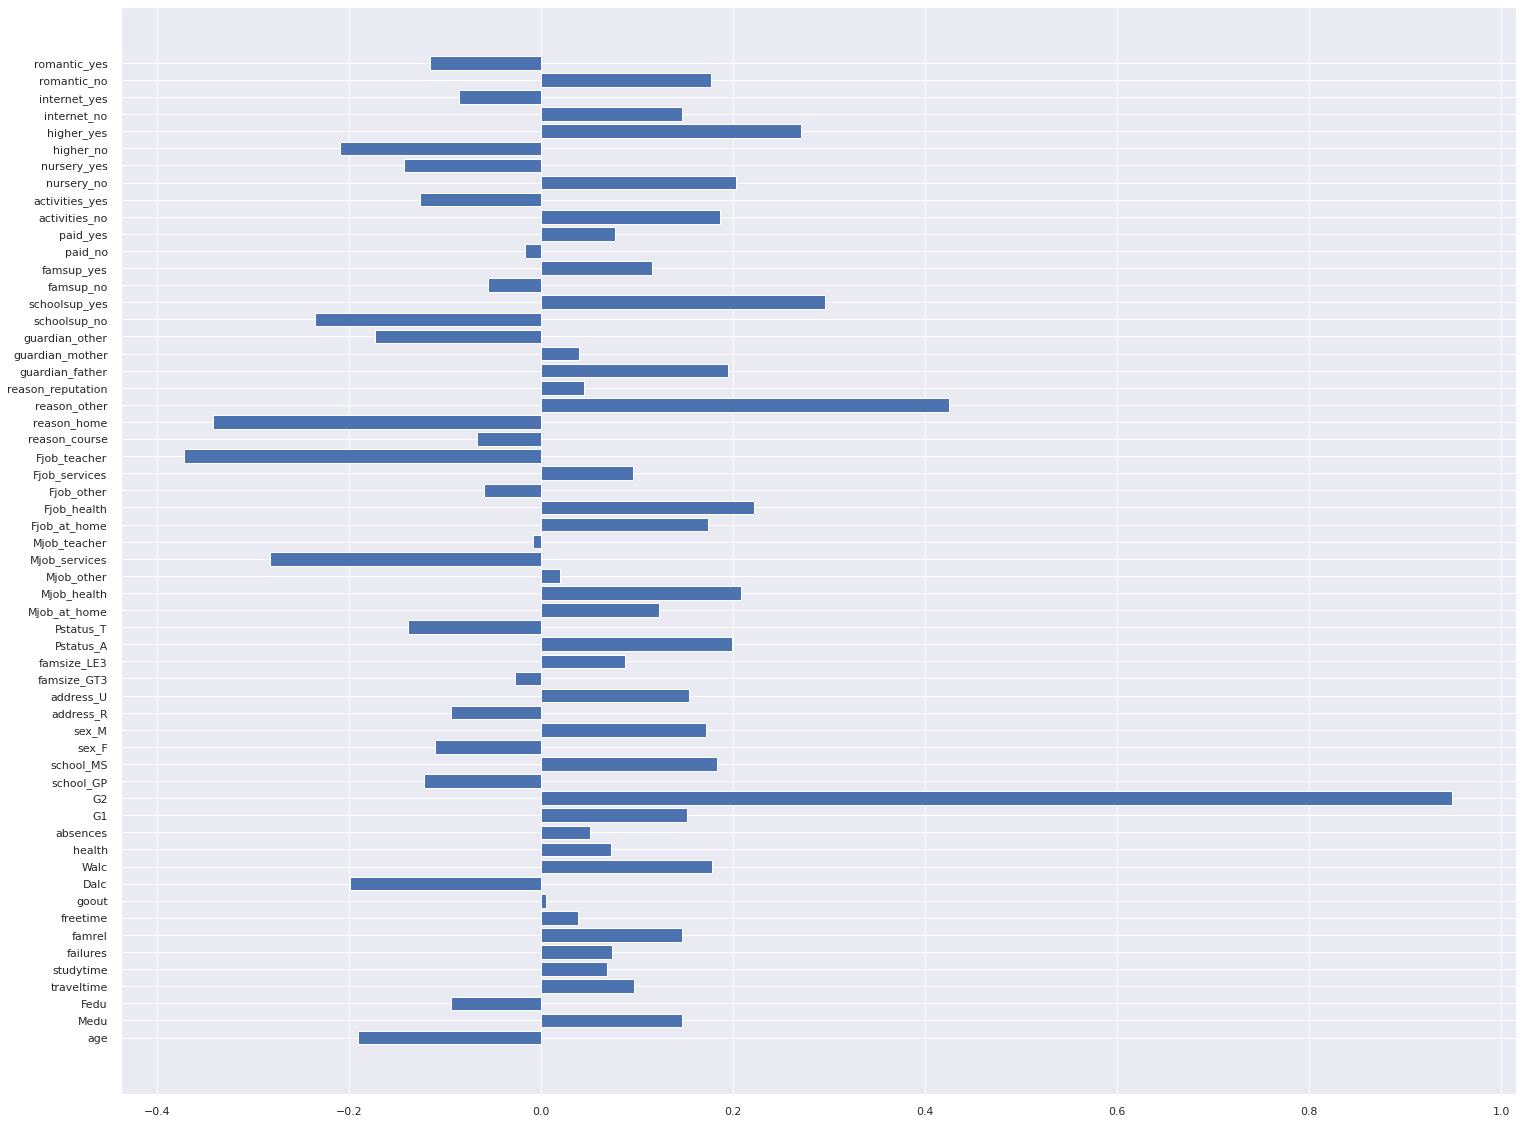

In [ ]:
names = X_train.columns
plt.figure(figsize=(25, 20))
plt.barh(names, r.values)

#### Versión sin G2:

In [ ]:
X_trainG = X_train.copy()
X_testG = X_test.copy()
X_trainG = X_train.drop(columns=['G2'])
X_testG = X_test.drop(columns=['G2'])

In [ ]:
X_trainG_st = X_train_st.copy()
X_testG_st = X_test_st.copy()
X_trainG_st = X_train_st.drop(columns=['G2', 'PC1', 'PC2', 'PC3'])
X_testG_st = X_test_st.drop(columns=['G2'])

In [ ]:
lr = LinearRegression();
lr.fit(X_trainG,y_train);

In [ ]:
print("Puntuación de validación cruzada:", np.mean(cross_val_score(lr, X_trainG, y_train, cv=10)))

Puntuación de validación cruzada: 0.55585337


In [ ]:
rlr = r2_score(y_test, lr.predict(X_testG))
rlr

0.6294752119389844

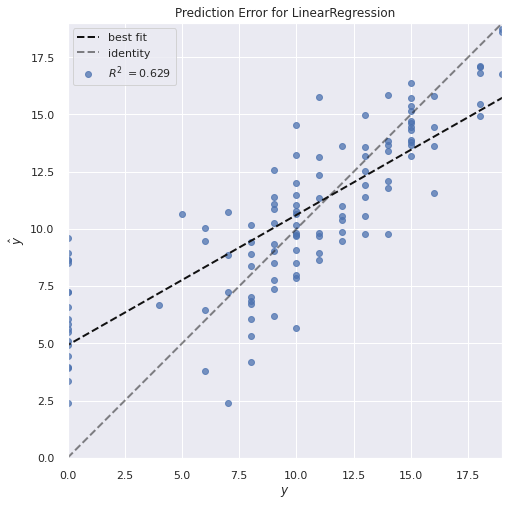

In [ ]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_testG, y_test, is_fitted=True)

In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_trainG))
result = model.fit()
LRresult = (result.summary().tables[1]).as_html()
results = pd.read_html(LRresult, header=0, index_col=0)[0]
r = results['coef'].drop('const')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<BarContainer object of 57 artists>

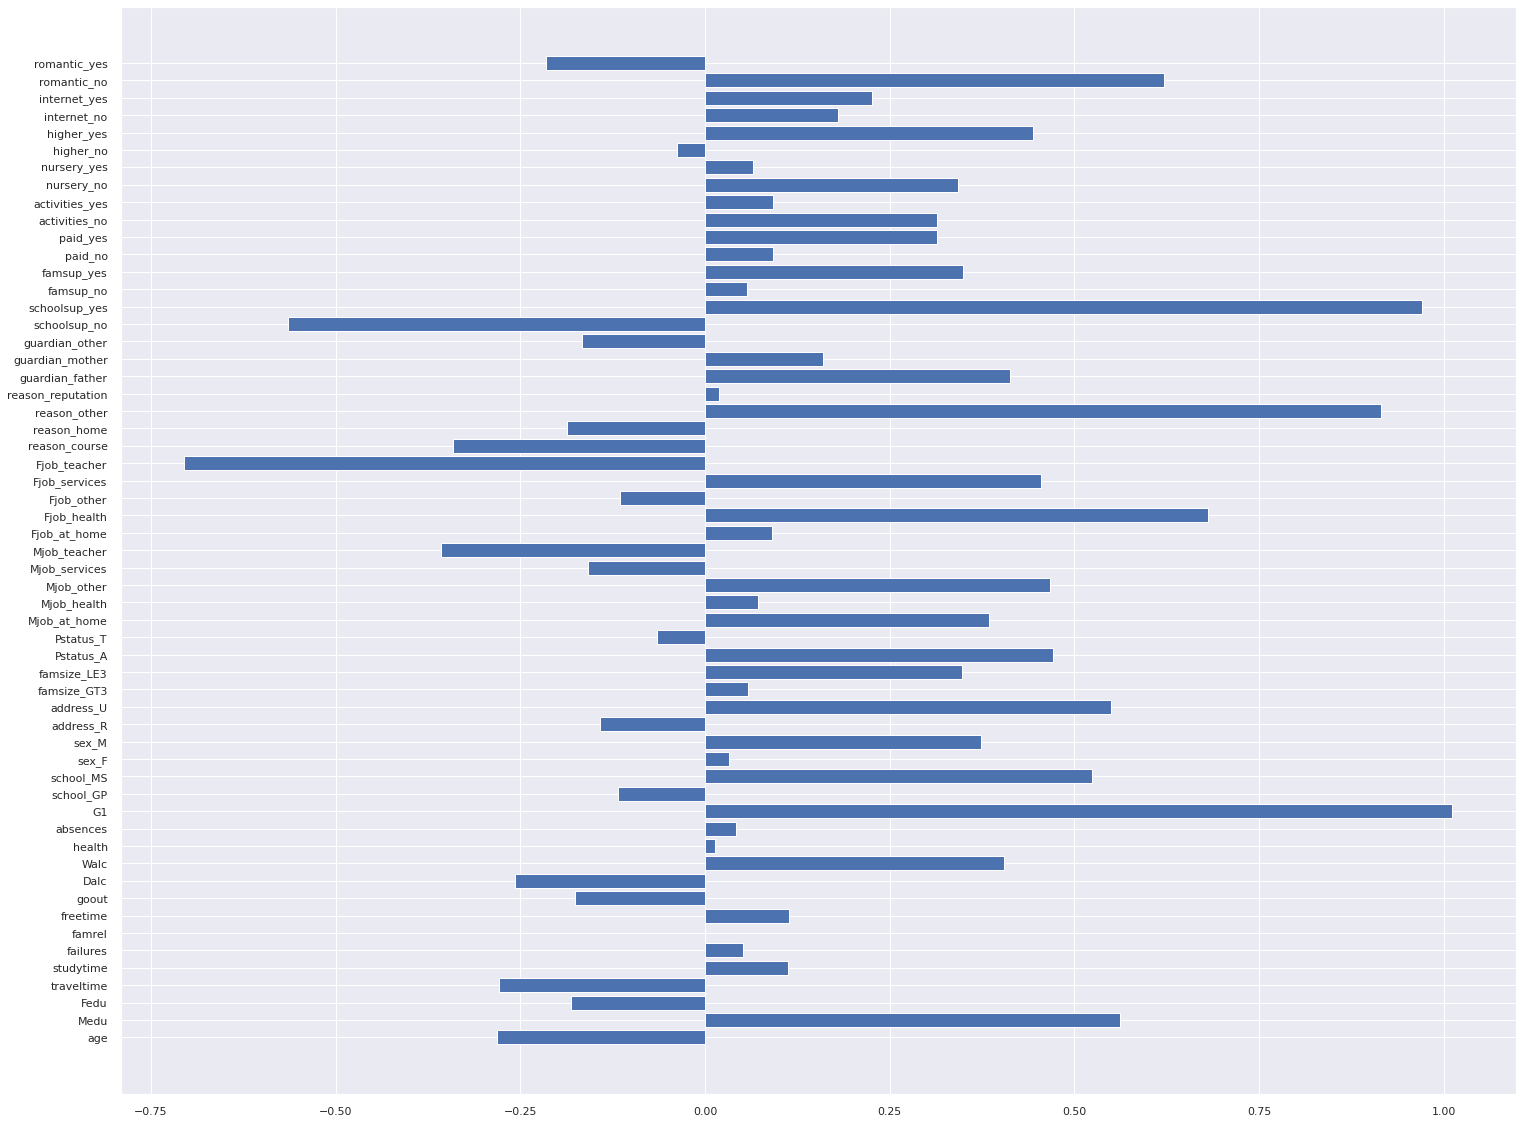

In [ ]:
names = X_trainG.columns
plt.figure(figsize=(25, 20))
plt.barh(names, r.values)

#### Versión sin G1 ni G2:

In [ ]:
X_trainGG = X_trainG.copy()
X_testGG = X_testG.copy()
X_trainGG = X_trainG.drop(columns=['G1'])
X_testGG = X_testG.drop(columns=['G1'])

In [ ]:
X_trainGG_st = X_trainG_st.copy()
X_testGG_st = X_testG_st.copy()
X_trainGG_st = X_trainG_st.drop(columns=['G1'])
X_testGG_st = X_testG_st.drop(columns=['G1'])

In [ ]:
lr = LinearRegression();
lr.fit(X_trainGG, y_train);

In [ ]:
print("Puntuación de validación cruzada:", np.mean(cross_val_score(lr, X_trainGG, y_train, cv=10)))

Puntuación de validación cruzada: -0.05084799


In [ ]:
print("Puntuación de R2:", r2_score(y_test, lr.predict(X_testGG)))

Puntuación de R2: 0.08755386249429087


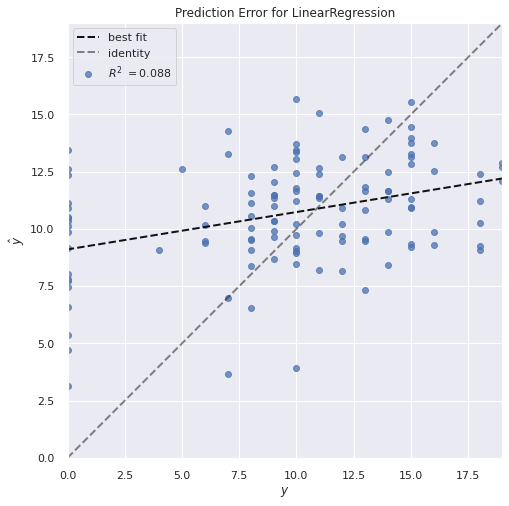

In [ ]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_testGG, y_test, is_fitted=True)

In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_trainGG))
result = model.fit()
LRresult = (result.summary().tables[1]).as_html()
results = pd.read_html(LRresult, header=0, index_col=0)[0]
r = results['coef'].drop('const')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<BarContainer object of 56 artists>

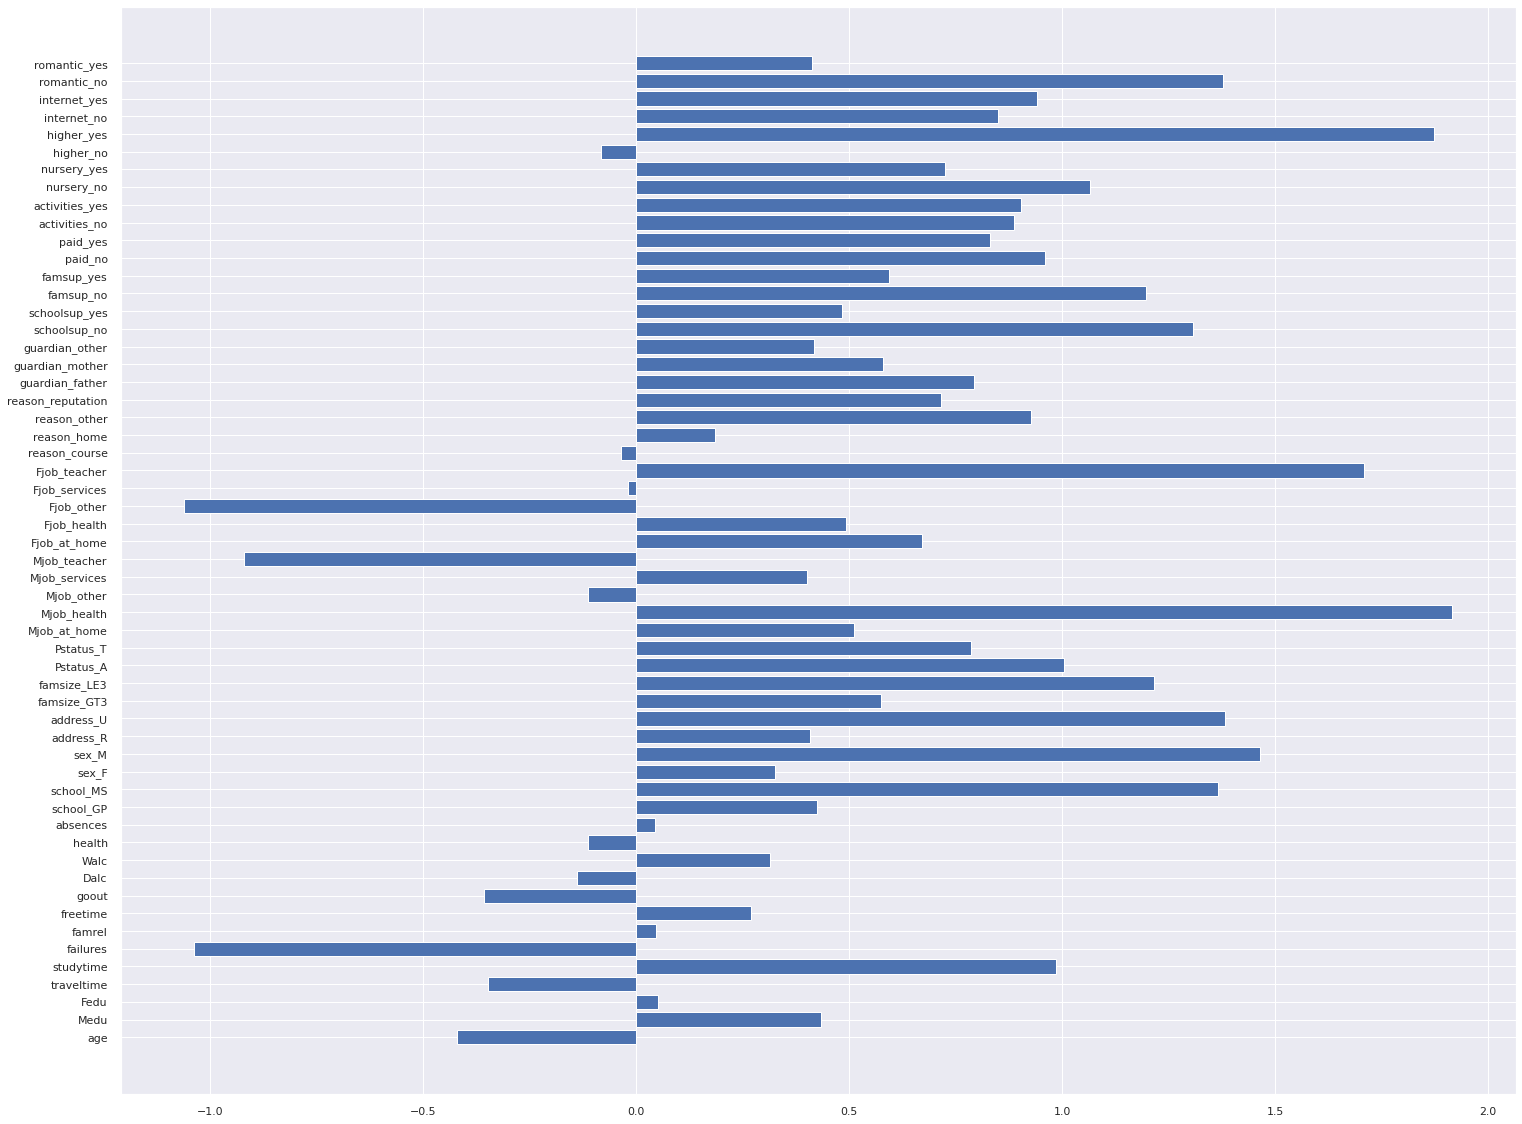

In [ ]:
names = X_trainGG.columns
plt.figure(figsize=(25, 20))
plt.barh(names, r.values)

### Regresión LASSO

In [ ]:
lambdas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
lass = LassoCV(alphas=lambdas, cv=10).fit(X_trainG, y_train)
print(f'Mejor lambda: {lass.alpha_}')
print('Coeficientes: \n', lass.coef_)

Mejor lambda: 0.1
Coeficientes: 
 [-3.59699771e-01  2.00695383e-01 -0.00000000e+00 -1.26321427e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.45919336e-01 -0.00000000e+00
  3.11425968e-02  9.85335178e-01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.34708649e-01  5.38948252e-16
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -6.50131460e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.58368046e-01  2.44556422e-16 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  3.54710585e-01
 -2.29260925e-16]


In [ ]:
print("Puntuación de validación cruzada:", np.mean(cross_val_score(lass, X_trainG, y_train, cv=10)))

Puntuación de validación cruzada: 0.6197594


In [ ]:
rlass = r2_score(y_test, lass.predict(X_testG))

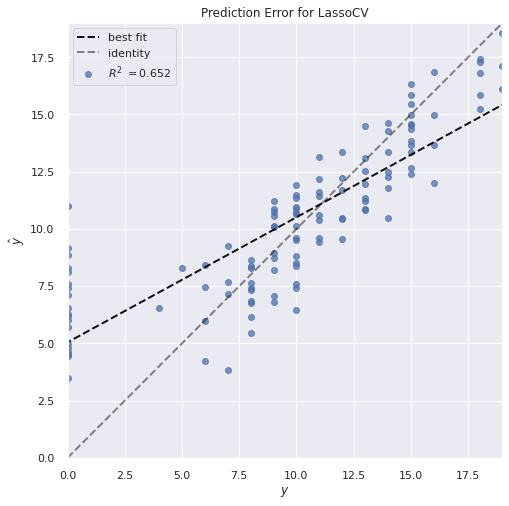

In [ ]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lass, X_testG, y_test, is_fitted=True)

<BarContainer object of 57 artists>

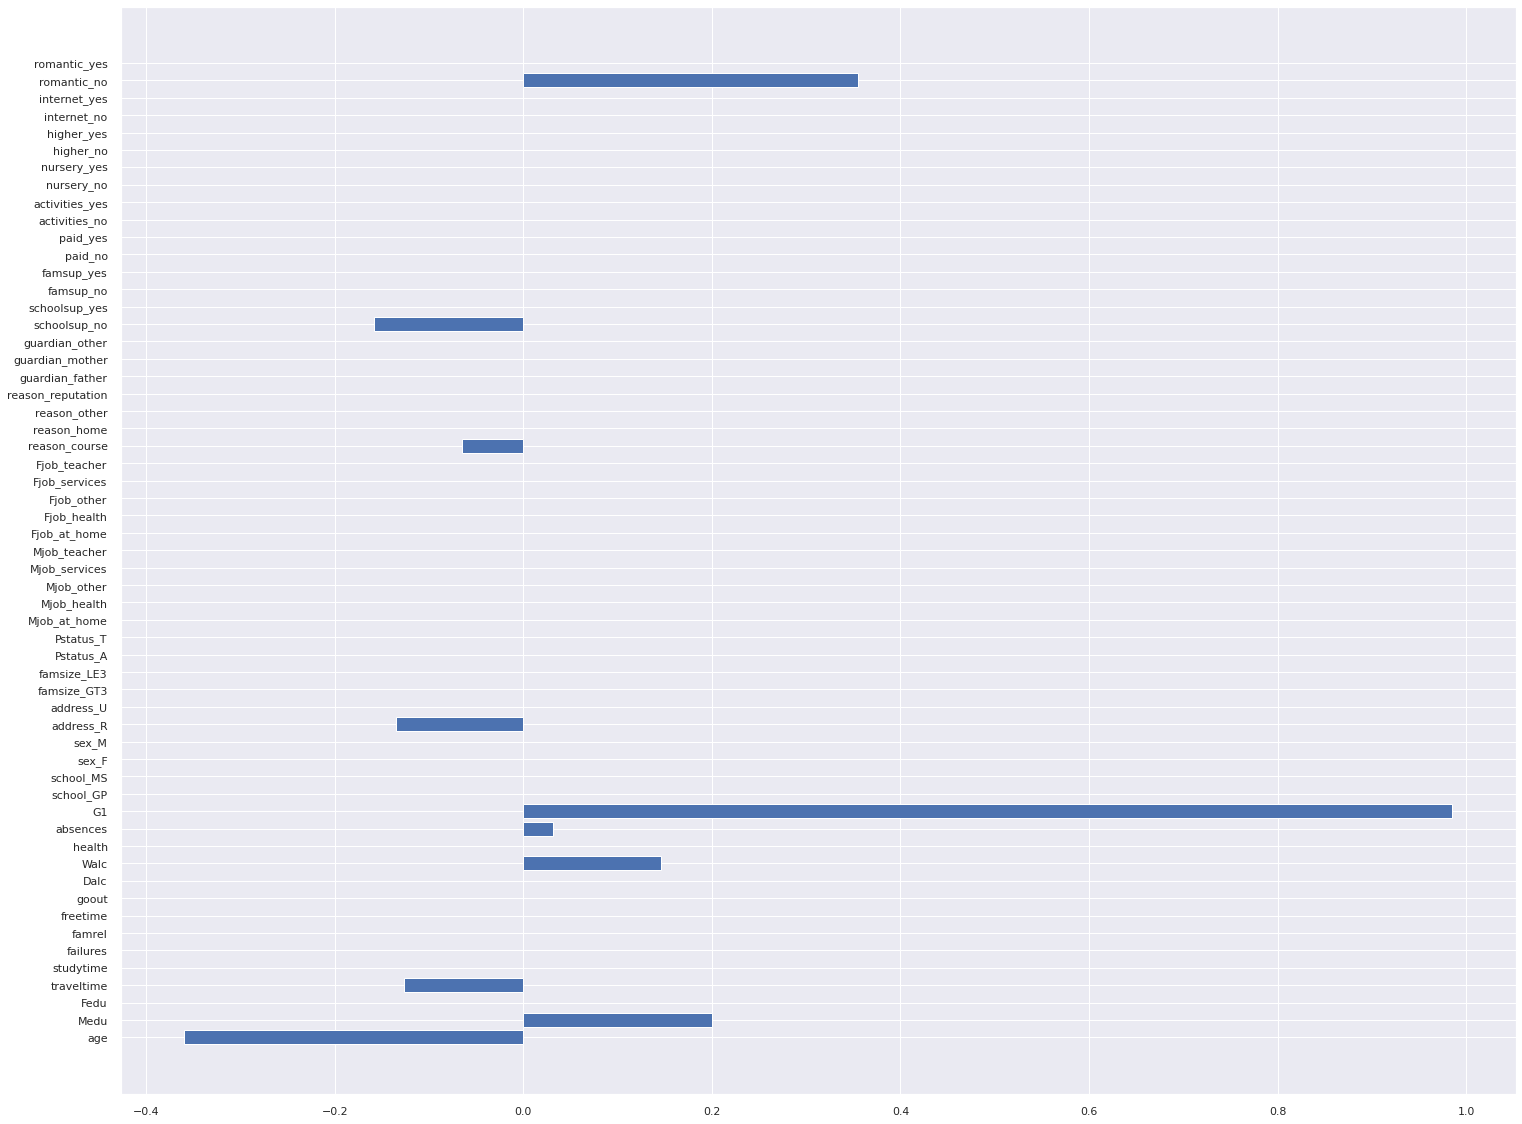

In [ ]:
names = X_testG.columns
plt.figure(figsize=(25, 20))
plt.barh(names, lass.coef_)

### K-vecinos más cercanos (KNN)

In [ ]:
knn =  KNeighborsRegressor()

In [ ]:
param = {'n_neighbors':[1, 3, 5, 7, 11, 15, 20, 25], 
         'weights':['distance', 'uniform'], 
         'leaf_size':[1, 5, 10, 15, 20, 25, 30],
         'metric': ['l2', 'l1', 'cosine']}
knn_gs =  GridSearchCV(knn, param, n_jobs=-1, cv=10);
knn_gs.fit(X_trainG, y_train);

In [ ]:
pd.DataFrame(knn_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
199,"{'leaf_size': 20, 'metric': 'l2', 'n_neighbors...",0.6629,1
151,"{'leaf_size': 15, 'metric': 'l2', 'n_neighbors...",0.6629,1
55,"{'leaf_size': 5, 'metric': 'l2', 'n_neighbors'...",0.6629,1
247,"{'leaf_size': 25, 'metric': 'l2', 'n_neighbors...",0.6629,1
7,"{'leaf_size': 1, 'metric': 'l2', 'n_neighbors'...",0.6629,1


In [ ]:
print("Puntuación de validación cruzada:", np.mean(cross_val_score(knn_gs.best_estimator_, X_trainG, y_train, cv=10)))

Puntuación de validación cruzada: 0.6629002


In [ ]:
rknn = r2_score(y_test, knn_gs.best_estimator_.predict(X_testG))

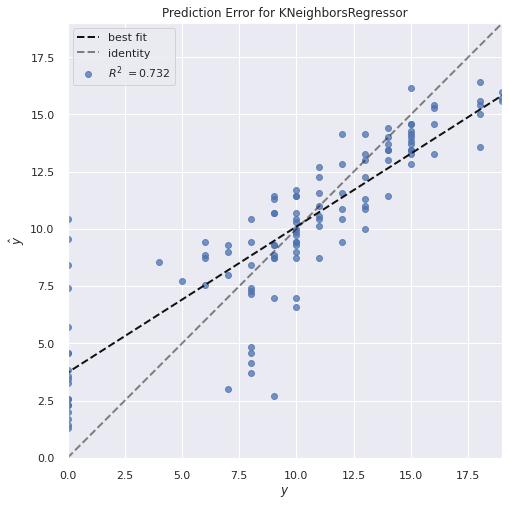

In [ ]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(knn_gs.best_estimator_, X_testG, y_test, is_fitted=True)

In [ ]:
knn_gs.best_estimator_.predict(S1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



array([2.85714286])

In [ ]:
knn_gs.best_estimator_.kneighbors(S1,10)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



(array([[0.        , 4.89897949, 5.29150262, 5.38516481, 5.65685425,
         5.74456265, 5.74456265, 5.74456265, 5.83095189, 6.08276253]]),
 array([[112, 223,  81, 178, 250,  72,  80, 229, 105,  91]]))

In [ ]:
# Para ver la nota de un ejemplo cercano, se puede usar la siguiente instrucción:
y_train.iloc[223]

0

In [ ]:
knn_gs.best_estimator_.predict(S2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



array([8.85714286])

In [ ]:
knn_gs.best_estimator_.kneighbors(S2, 10)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



(array([[0.        , 6.        , 6.63324958, 6.70820393, 6.78232998,
         6.92820323, 6.92820323, 7.        , 7.        , 7.07106781]]),
 array([[ 67, 207, 196, 198, 119, 177, 114,  19,  96, 107]]))

In [ ]:
knn_gs.best_estimator_.predict(S3)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



array([10.42857143])

In [ ]:
knn_gs.best_estimator_.kneighbors(S3, 10)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



(array([[4.12310563, 4.12310563, 4.35889894, 4.47213595, 4.47213595,
         4.79583152, 4.79583152, 4.79583152, 5.19615242, 5.19615242]]),
 array([[ 10, 220, 172, 246,  82, 219,  63,  99, 131, 187]]))

### Comparativa final

In [ ]:
r2_results = pd.DataFrame({'R. Lineal':rlr, 'R. LASSO':rlass, 'K-NN':rknn},index=['Puntuación R2'])

r2_results.loc['Validación cruzada', :] =[np.mean(cross_val_score(lr, X_trainG, y_train, cv=10)),
                            
                                np.mean(cross_val_score(lass, X_trainG, y_train, cv=10)),
                                np.mean(cross_val_score(knn_gs.best_estimator_, X_trainG, y_train, cv=10))]
r2_results

,R. Lineal,R. LASSO,K-NN
Puntuación R2,0.629475,0.652053,0.732013
Validación cruzada,0.555853,0.619759,0.662900


## Modelos no lineales

### Multi-Layer Perceptron (MLP)

In [ ]:
mlp = MLPRegressor(max_iter=10000, early_stopping=True, n_iter_no_change=15, random_state=0);

In [ ]:
param = {'hidden_layer_sizes':[10, 50, 100, 200, 300], 
'activation':['relu', 'identity', 'logistic'], 
'alpha':[0.0001, 0.001, 0.01],
'learning_rate_init': [0.001, 0.01, 0.1],
'n_iter_no_change':[10, 20, 40, 50], 
'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp_bs = BayesSearchCV(mlp, param, n_iter=15, n_jobs=-1, cv=10, refit=True, random_state=0)
mlp_bs.fit(X_trainG_st.values, y_train);

In [ ]:
pd.DataFrame(mlp_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
14,"{'activation': 'identity', 'alpha': 0.01, 'hid...",0.508364,1
3,"{'activation': 'identity', 'alpha': 0.01, 'hid...",0.496636,2
13,"{'activation': 'identity', 'alpha': 0.01, 'hid...",0.490471,3
12,"{'activation': 'identity', 'alpha': 0.01, 'hid...",0.435306,4
6,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.429474,5


In [ ]:
mlp_bs.best_estimator_.get_params()

{'activation': 'identity',
 'alpha': 0.01,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.1,
 'max_fun': 15000,
 'max_iter': 10000,
 'momentum': 0.9,
 'n_iter_no_change': 40,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
mlpr = r2_score(y_test, mlp_bs.best_estimator_.predict(X_testG_st))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but MLPRegressor was fitted without feature names



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but MLPRegressor was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but MLPRegressor was fitted without feature names



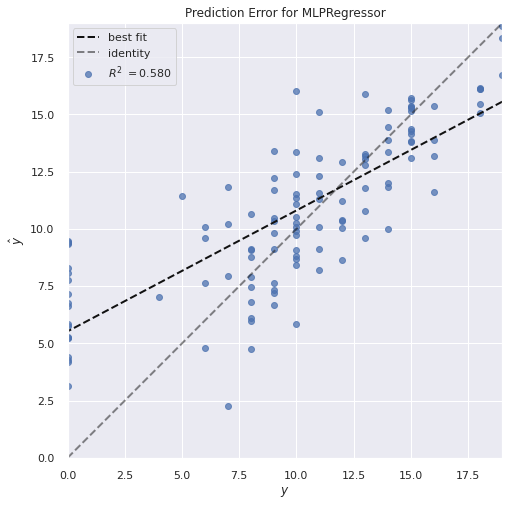

In [ ]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(mlp_bs.best_estimator_, X_testG_st, y_test, is_fitted=True)

<BarContainer object of 57 artists>

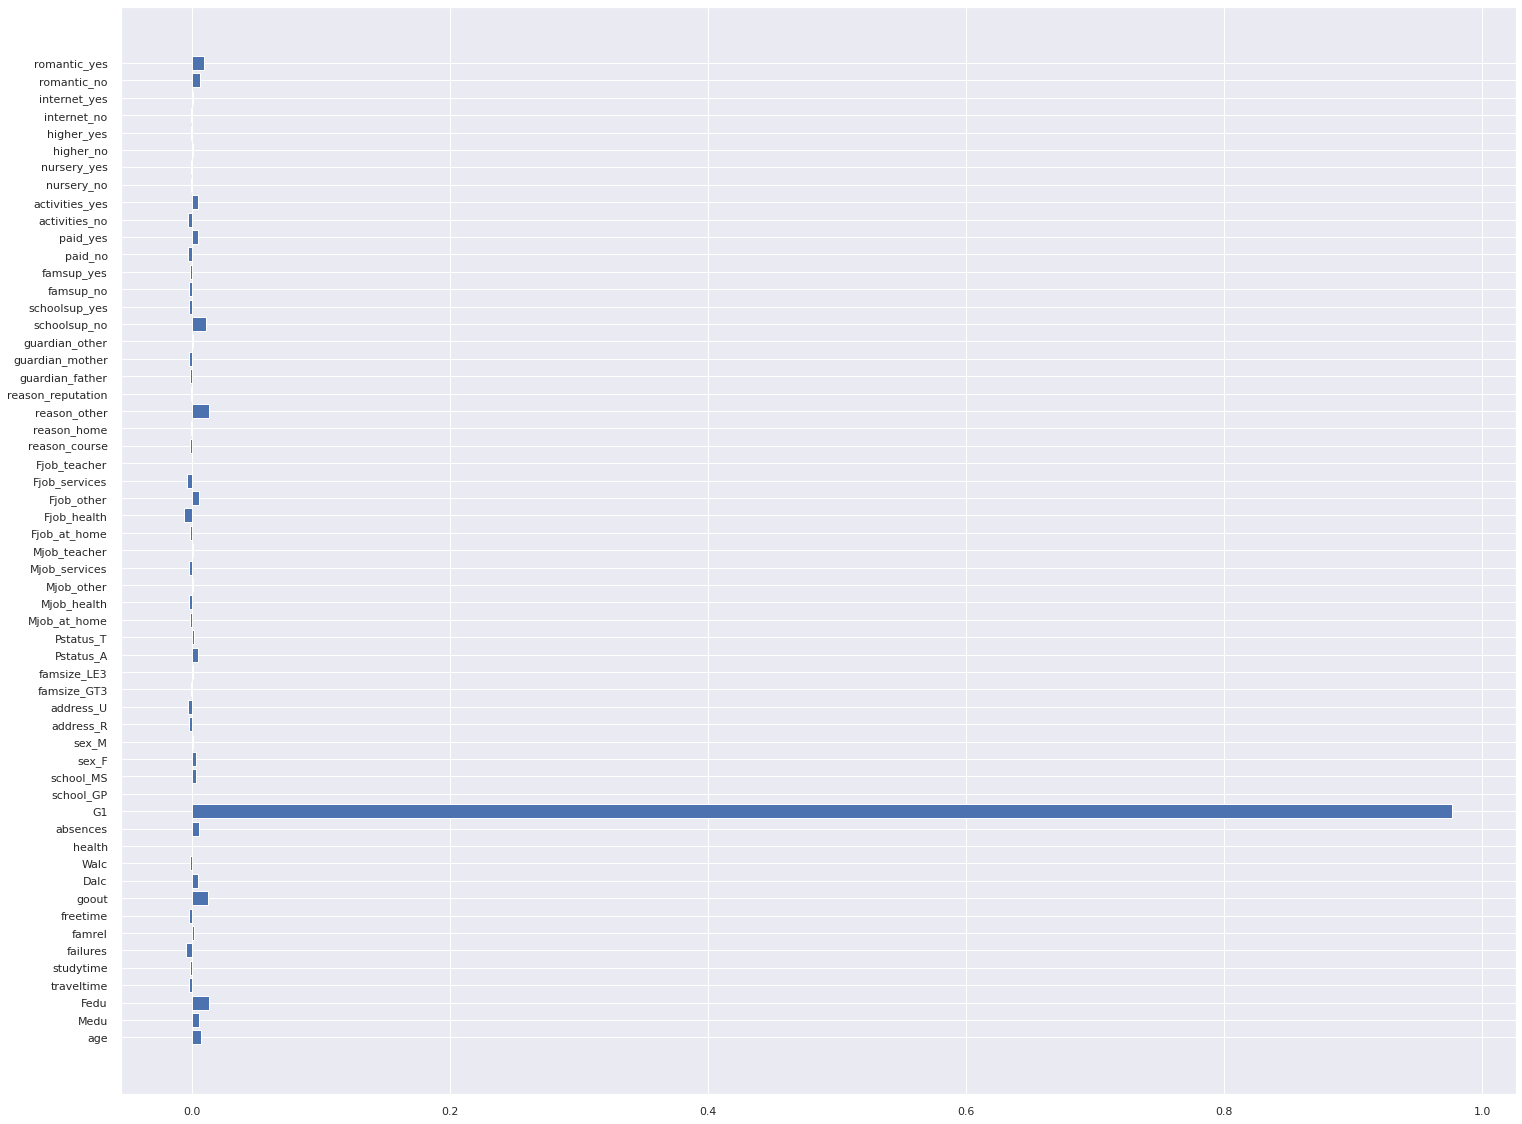

In [ ]:
names = X_trainG.columns
mlp_bs_pi = permutation_importance(mlp_bs.best_estimator_, X_testG_st.values, y_test, n_repeats=30, random_state=0)
plt.figure(figsize=(25, 20))
plt.barh(names, mlp_bs_pi.importances_mean)

### Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor(random_state=0, n_iter_no_change=5)

In [ ]:
param = {'n_estimators':[5, 10, 25, 40, 50, 75, 100, 200], 
         'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
         'criterion':['friedman_mse', 'squared_error'], 
         'max_depth':[None, 1, 2, 3, 5, 8, 9, 10, 15],
         'min_samples_leaf':[1, 2, 3, 5, 10], 
         'learning_rate':[0.1, 0.5, 1, 3, 5, 10, 15]}

gb_bs = BayesSearchCV(gb, param, n_iter=15, cv=10, n_jobs=-1, refit=True, random_state=0)
gb_bs.fit(X_trainG, y_train);

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



In [ ]:
pd.DataFrame(gb_bs.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
13,"{'criterion': 'squared_error', 'learning_rate'...",0.629309,1
14,"{'criterion': 'squared_error', 'learning_rate'...",0.629309,1
2,"{'criterion': 'squared_error', 'learning_rate'...",0.596698,3
12,"{'criterion': 'squared_error', 'learning_rate'...",0.596698,3
11,"{'criterion': 'friedman_mse', 'learning_rate':...",0.406813,5


In [ ]:
gb_bs.best_estimator_.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(criterion='squared_error', loss='huber', max_depth=5,
                          min_samples_leaf=2, n_estimators=25,
                          n_iter_no_change=5, random_state=0)>

In [ ]:
gbr = r2_score(y_test, gb_bs.best_estimator_.predict(X_testG))

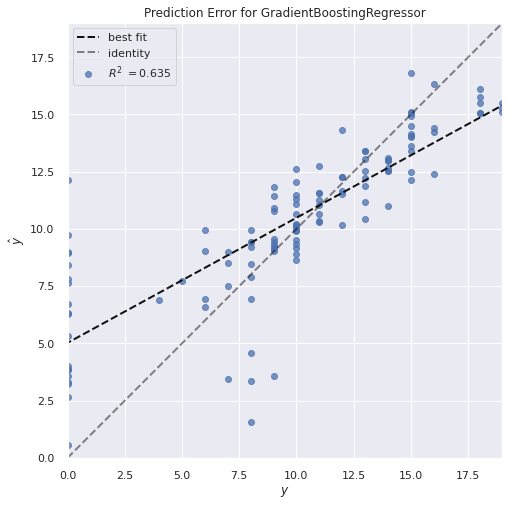

In [ ]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(gb_bs.best_estimator_, X_testG, y_test, is_fitted=True)

In [ ]:
gb_bs_pi = permutation_importance(gb_bs.best_estimator_, X_testG, y_test, n_repeats=30, random_state=0)

<BarContainer object of 57 artists>

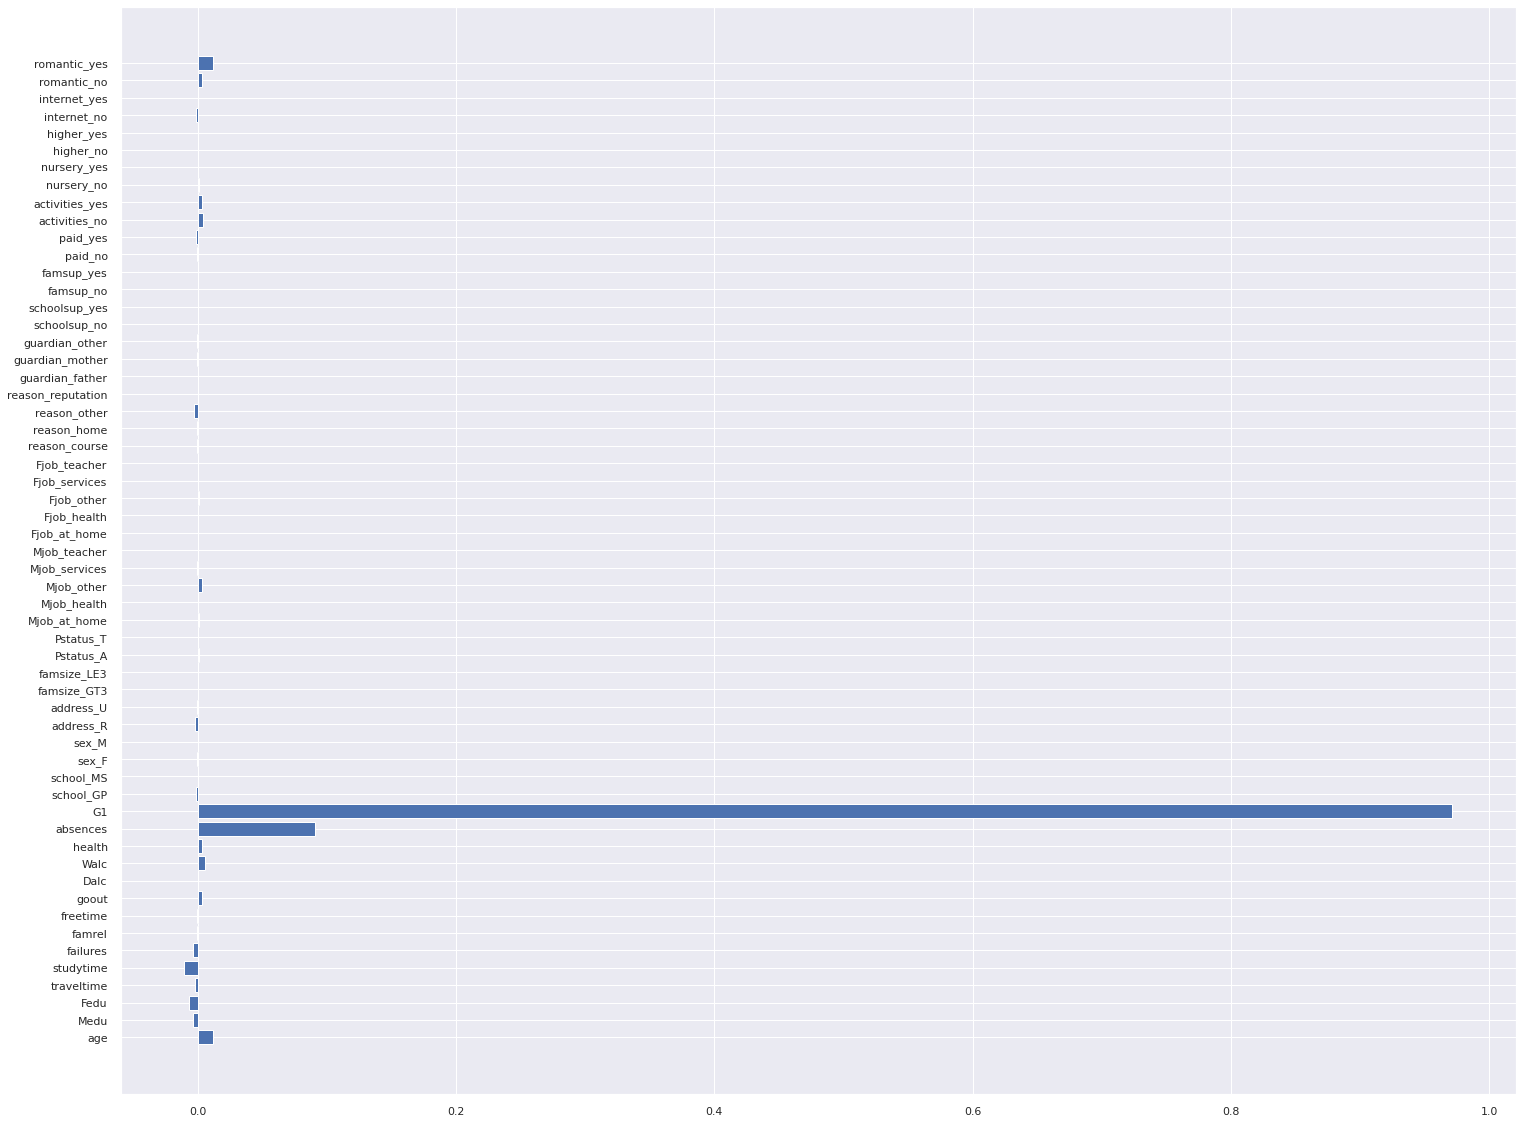

In [ ]:
names = X_testG.columns
plt.figure(figsize=(25, 20))
plt.barh(names, gb_bs_pi.importances_mean)

### Random Forest



In [ ]:
rf =  RandomForestRegressor(random_state=0)

In [ ]:
param = {'n_estimators': [5, 10, 25, 40, 50, 75, 100, 200], 
         'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
         'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9],
         'min_samples_leaf':[1, 2, 3, 5, 10]}

rf_bs = BayesSearchCV(rf, param, n_iter=40, cv=10, n_jobs=-1, refit=True, random_state=0)
rf_bs.fit(X_trainG, y_train);

In [ ]:
pd.DataFrame(rf_bs.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
35,"{'criterion': 'absolute_error', 'max_depth': N...",0.699188,1
34,"{'criterion': 'absolute_error', 'max_depth': 7...",0.696466,2
19,"{'criterion': 'absolute_error', 'max_depth': 7...",0.692939,3
33,"{'criterion': 'friedman_mse', 'max_depth': Non...",0.692197,4
9,"{'criterion': 'friedman_mse', 'max_depth': 5, ...",0.690384,5


In [ ]:
rf_bs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rfr = r2_score(y_test, rf_bs.best_estimator_.predict(X_testG))

In [ ]:
rf_bs_pi = permutation_importance(rf_bs.best_estimator_, X_testG, y_test, n_repeats=30, random_state=0)

<BarContainer object of 57 artists>

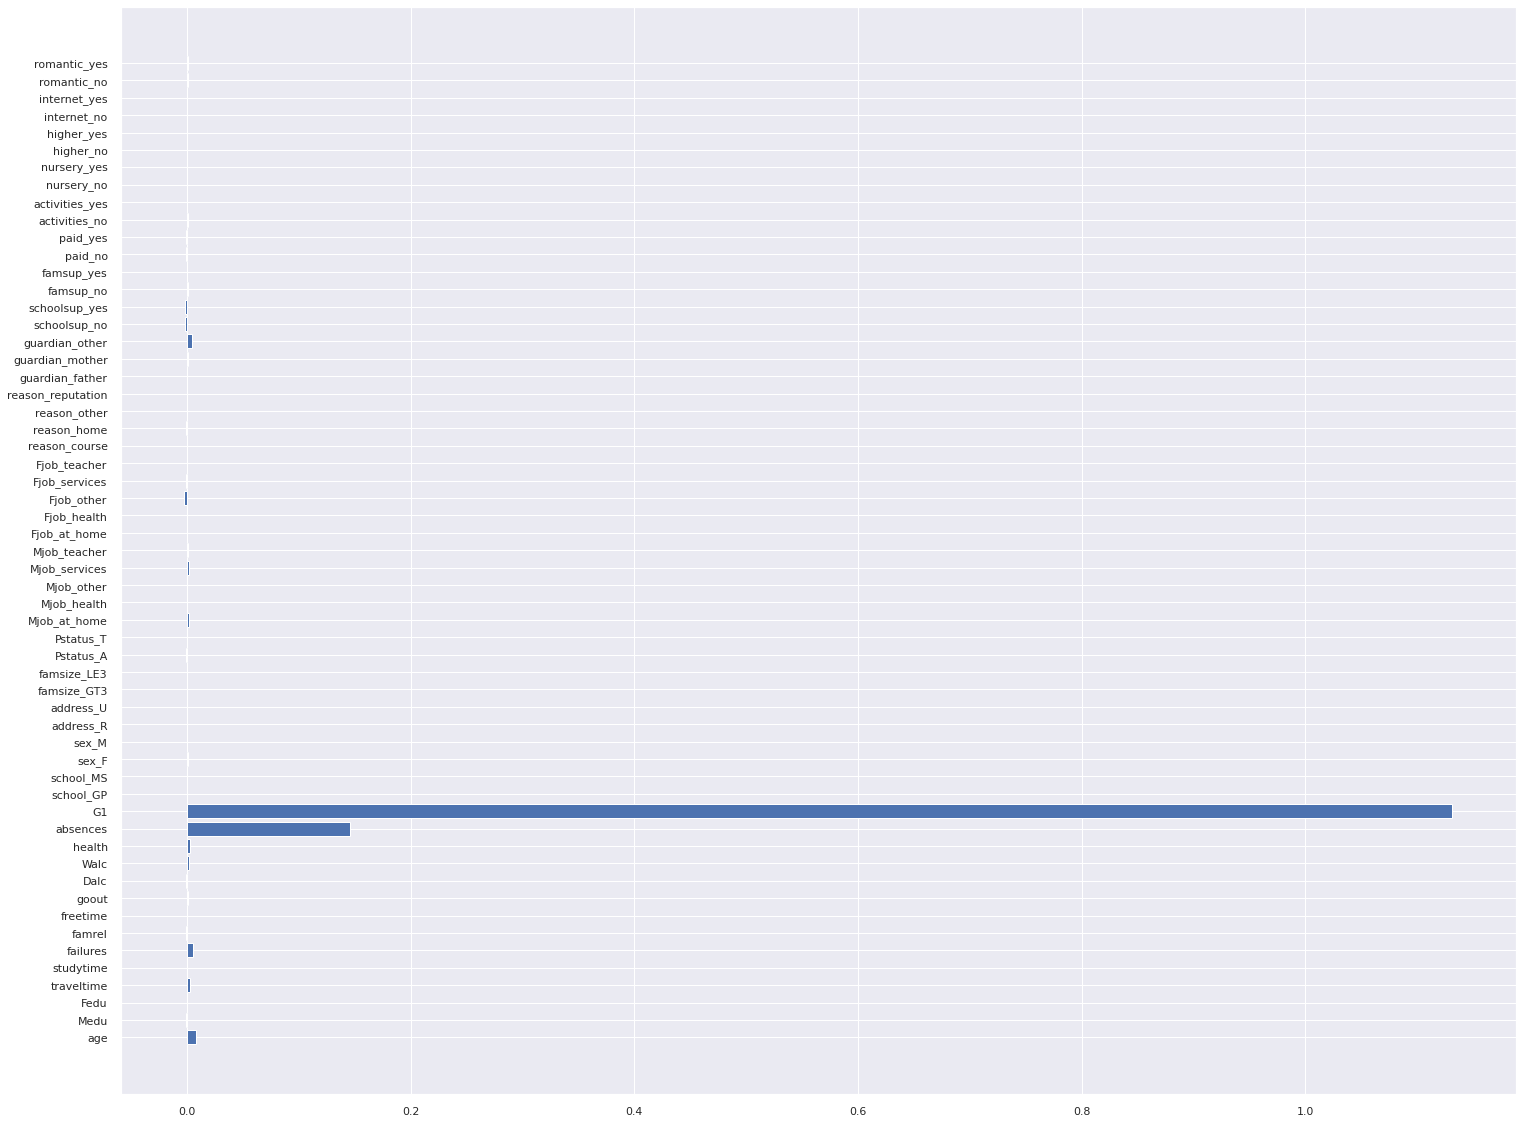

In [ ]:
plt.figure(figsize=(25, 20))
plt.barh(names, rf_bs_pi.importances_mean)

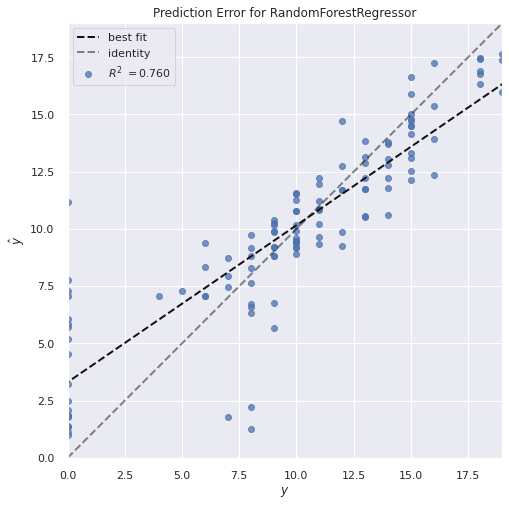

In [ ]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(rf_bs.best_estimator_, X_testG, y_test, is_fitted=True)

In [ ]:
rf_bs.best_estimator_.predict(S1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([1.505])

In [ ]:
rf_bs.best_estimator_.predict(S2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([9.255])

In [ ]:
rf_bs.best_estimator_.predict(S3)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([11.155])

In [ ]:
[indicator,n_nodes_ptr] = rf_bs.best_estimator_.decision_path(X_trainG)

In [ ]:
n_nodes_ptr
# Del valor 0 al 129 de la matrix Indicator, tenemos los nodos del árbol 0, del 130 al 262 el del árbol 1, ...

array([    0,   129,   262,   395,   518,   645,   780,   923,  1056,
        1197,  1336,  1479,  1614,  1747,  1878,  2019,  2130,  2271,
        2400,  2539,  2682,  2811,  2948,  3087,  3220,  3365,  3498,
        3643,  3784,  3925,  4052,  4189,  4320,  4461,  4590,  4733,
        4856,  4995,  5130,  5273,  5404,  5541,  5670,  5797,  5926,
        6073,  6216,  6349,  6492,  6627,  6772,  6911,  7042,  7175,
        7302,  7439,  7578,  7725,  7858,  7995,  8134,  8275,  8424,
        8551,  8674,  8799,  8938,  9087,  9222,  9357,  9500,  9631,
        9760,  9901, 10054, 10175, 10306, 10431, 10560, 10701, 10840,
       10985, 11124, 11263, 11390, 11527, 11674, 11801, 11944, 12081,
       12220, 12365, 12510, 12635, 12780, 12901, 13042, 13187, 13336,
       13469, 13604])

In [ ]:
indicator.toarray()[0][0:129]
# Aquí vemos que nodos del árbol 1 están siendo usados.

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

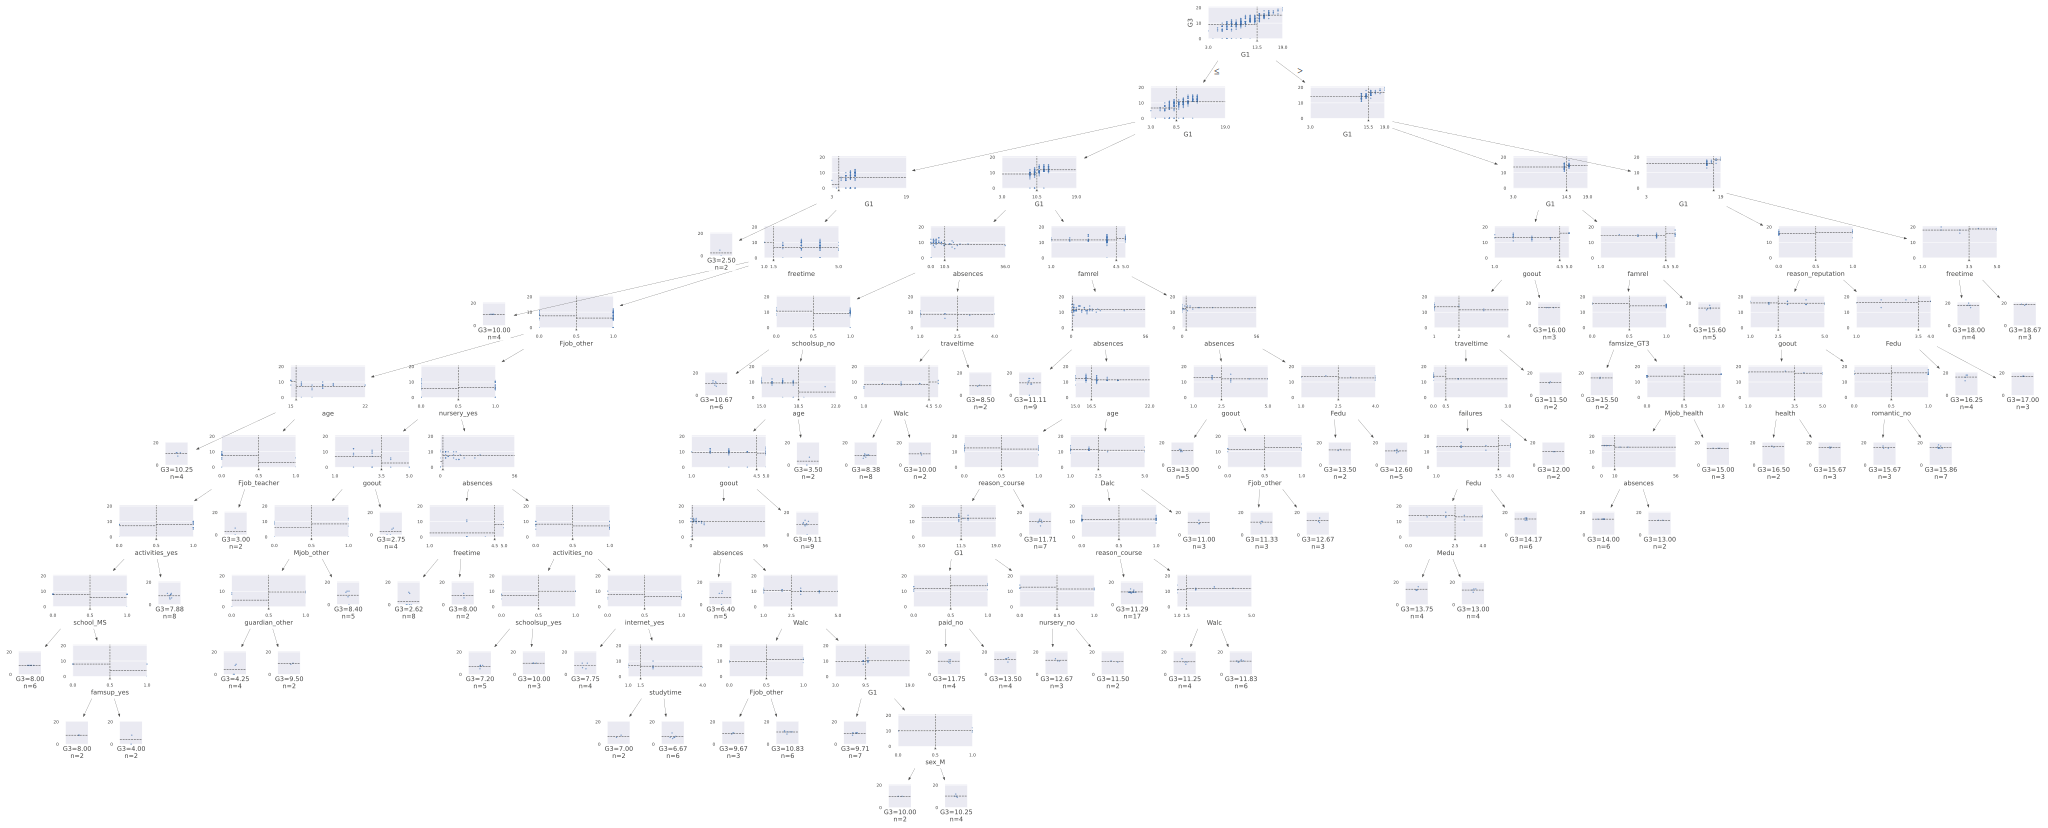

In [ ]:
dtreeviz(rf_bs.best_estimator_.estimators_[0], X_trainG, y_train, feature_names=X_trainG.columns, target_name="G3")

### Comparativa final

In [ ]:
r2_results = pd.DataFrame({'MLP':mlpr, 'G.B':gbr, 'R.F':rfr},index=['Puntuación R2'])

r2_results.loc['Validación cruzada', :] =[np.mean(cross_val_score(mlp_bs.best_estimator_, X_trainG_st.values, y_train, cv=10)),
                            
                                np.mean(cross_val_score(gb_bs.best_estimator_, X_trainG, y_train, cv=10)),
                                np.mean(cross_val_score(rf_bs.best_estimator_, X_trainG, y_train, cv=10))]
r2_results

,MLP,G.B,R.F
Puntuación R2,0.579603,0.635162,0.759890
Validación cruzada,0.508364,0.629309,0.699188


## Ejecuciones adicionales

### Arbol de decisión

In [ ]:
dt = DecisionTreeRegressor(random_state=0)

In [ ]:
param = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9],
         'min_samples_leaf':[1, 2, 3, 5, 10],
         'splitter':['best', 'random'], 
         'max_leaf_nodes':[5, 10, 20, 30]}

dt_bs =  BayesSearchCV(dt, param, n_iter=40, cv=10, n_jobs=-1, refit=True, random_state=0)
dt_bs.fit(X_trainG, y_train);

In [ ]:
pd.DataFrame(dt_bs.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
21,"{'criterion': 'friedman_mse', 'max_depth': 3, ...",0.670695,1
17,"{'criterion': 'friedman_mse', 'max_depth': 3, ...",0.670695,1
12,"{'criterion': 'friedman_mse', 'max_depth': 3, ...",0.670695,1
19,"{'criterion': 'friedman_mse', 'max_depth': 3, ...",0.665619,4
24,"{'criterion': 'friedman_mse', 'max_depth': 3, ...",0.665619,4


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



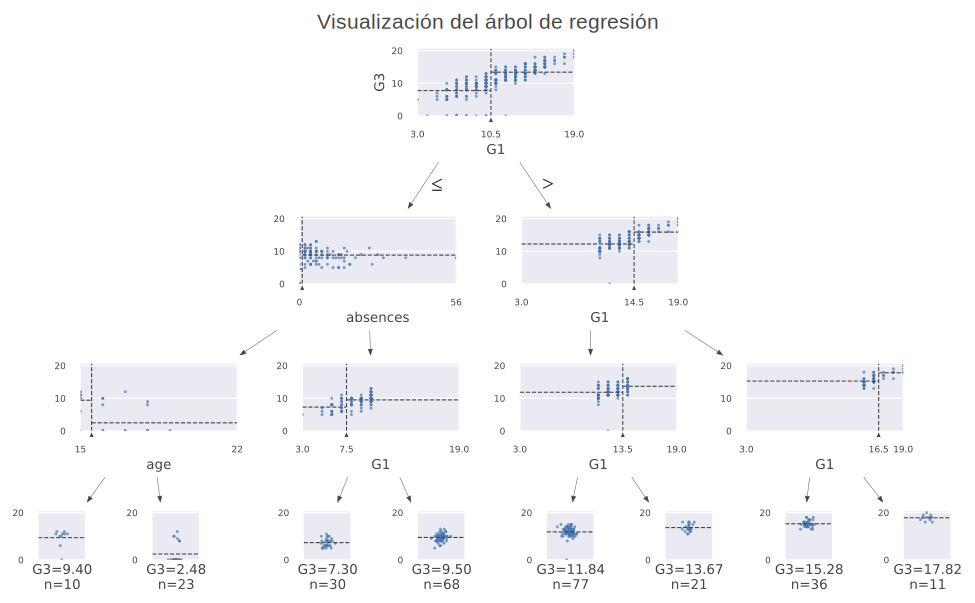

In [ ]:
dtreeviz(dt_bs.best_estimator_, scale=1.5, x_data=X_trainG, y_data=y_train,
         target_name='G3', feature_names=[c for c in X_train.columns],
         title="Visualización del árbol de regresión")

### Gradient Boosting sin G1 ni G2

In [ ]:
gb = GradientBoostingRegressor(random_state=0, n_iter_no_change=5)

In [ ]:
param = {'n_estimators':[5, 10, 25, 40, 50, 75, 100, 200], 
         'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
         'criterion':['friedman_mse', 'squared_error'], 
         'max_depth':[None, 1, 2, 3, 5, 8, 9, 10, 15],
         'min_samples_leaf':[1, 2, 3, 5, 10], 
         'learning_rate':[0.1, 0.5, 1, 3, 5, 10, 15]}

gb_bs = BayesSearchCV(gb, param, n_iter=15, cv=10, n_jobs=-1, refit=True, random_state=0)
gb_bs.fit(X_trainGG, y_train);

In [ ]:
pd.DataFrame(gb_bs.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
2,"{'criterion': 'squared_error', 'learning_rate'...",0.128354,1
10,"{'criterion': 'squared_error', 'learning_rate'...",-0.075464,2
4,"{'criterion': 'friedman_mse', 'learning_rate':...",-0.922095,3
13,"{'criterion': 'friedman_mse', 'learning_rate':...",-444.542082,4
11,"{'criterion': 'squared_error', 'learning_rate'...",-477.065889,5


In [ ]:
gb_bs.best_estimator_.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(criterion='squared_error', loss='huber', max_depth=2,
                          min_samples_leaf=2, n_estimators=25,
                          n_iter_no_change=5, random_state=0)>

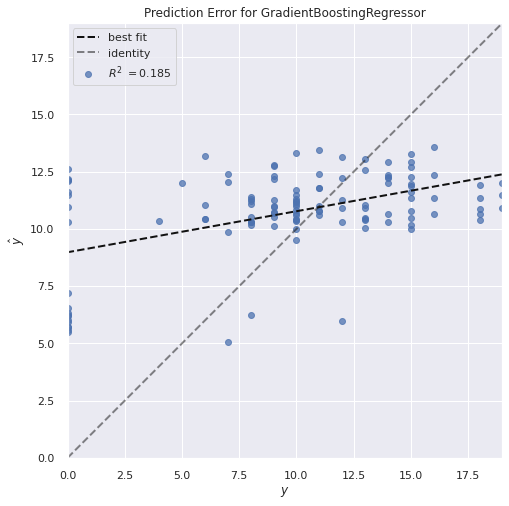

In [ ]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(gb_bs.best_estimator_, X_testGG, y_test, is_fitted=True)

In [ ]:
gb_bs_pi = permutation_importance(gb_bs.best_estimator_, X_testGG, y_test, n_repeats=30, random_state=0)

In [ ]:
names = X_testGG.columns

<BarContainer object of 56 artists>

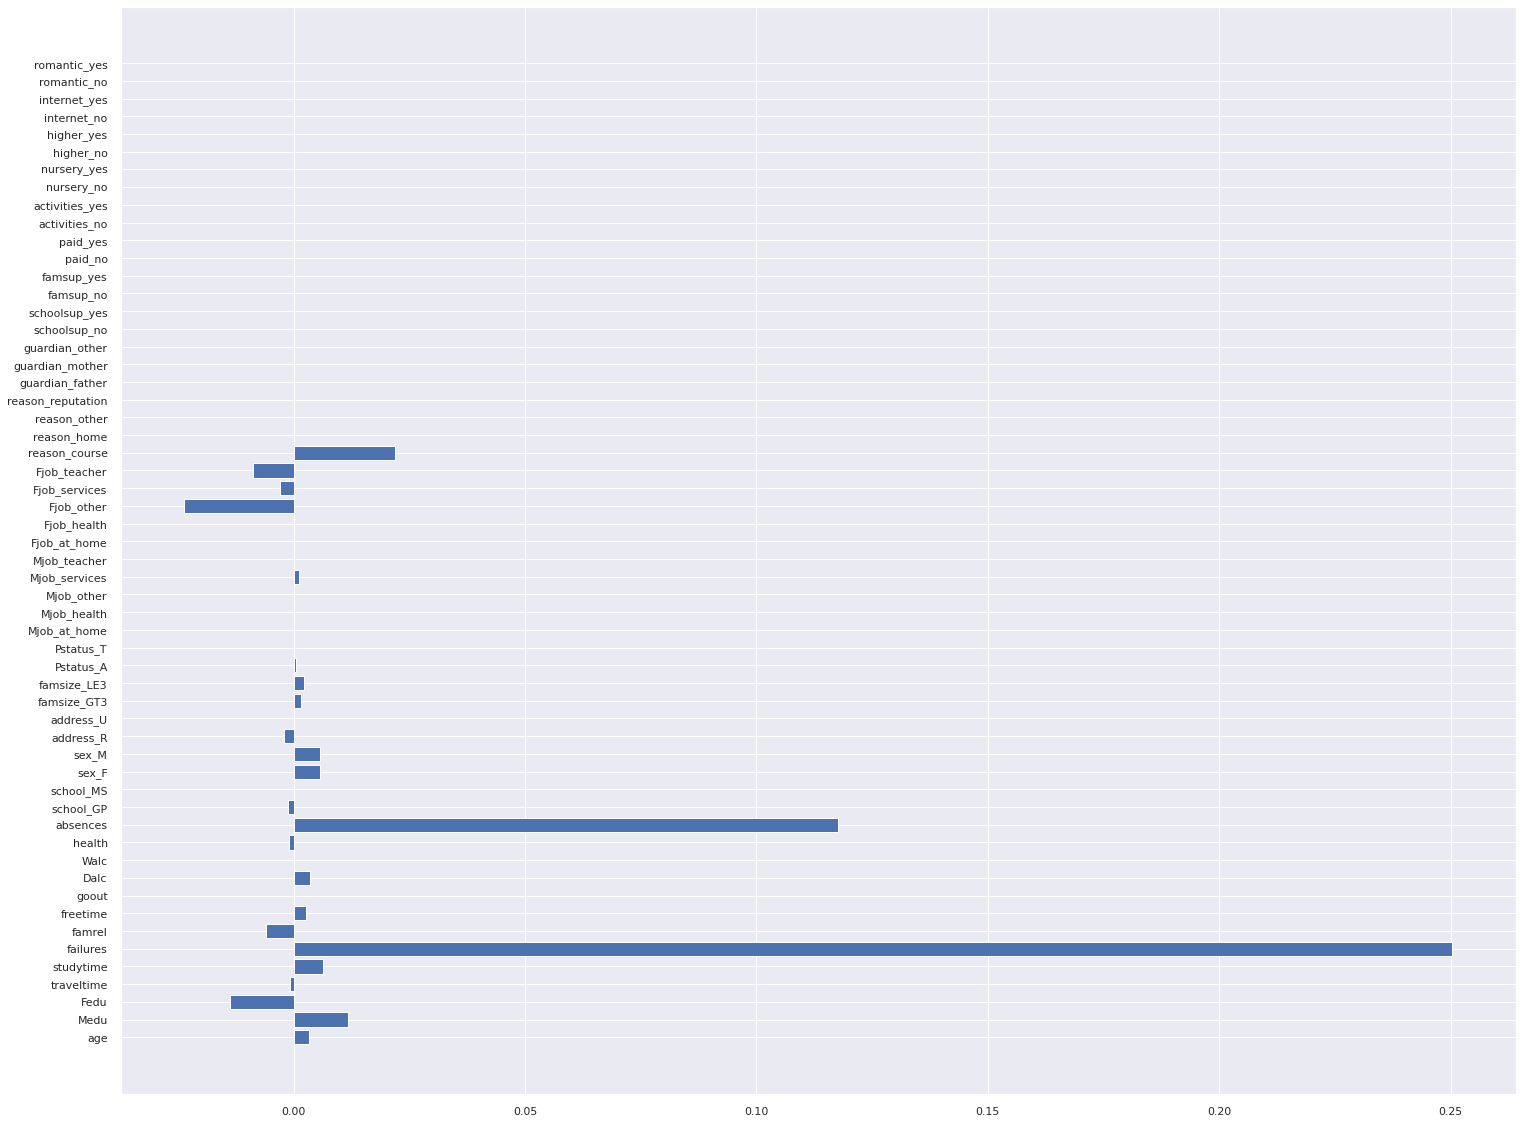

In [ ]:
plt.figure(figsize=(25, 20))
plt.barh(names, gb_bs_pi.importances_mean)

### Árbol sin G1 ni G2

In [ ]:
dt_GG = DecisionTreeRegressor(random_state=0)

In [ ]:
param = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9],
         'min_samples_leaf':[1, 2, 3, 5, 10],
         'splitter':['best', 'random'], 
         'max_leaf_nodes':[5, 10, 20, 30]}

dt_bs =  BayesSearchCV(dt, param, n_iter=40, cv=10, n_jobs=-1, refit=True, random_state=0)
dt_bs.fit(X_trainGG, y_train);

In [ ]:
pd.DataFrame(dt_bs.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
19,"{'criterion': 'friedman_mse', 'max_depth': 2, ...",0.187202,1
23,"{'criterion': 'squared_error', 'max_depth': 2,...",0.187202,1
21,"{'criterion': 'squared_error', 'max_depth': 2,...",0.187202,1
20,"{'criterion': 'squared_error', 'max_depth': 2,...",0.187202,1
18,"{'criterion': 'friedman_mse', 'max_depth': 2, ...",0.187202,1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



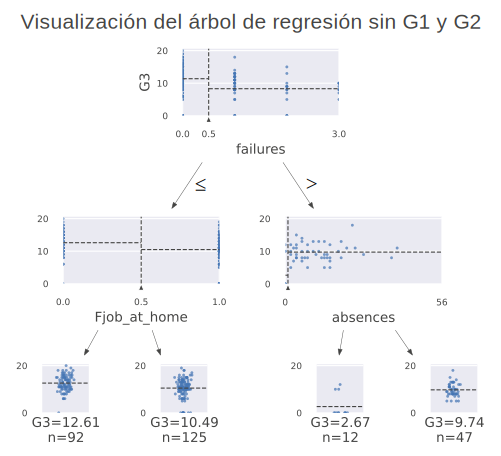

In [ ]:
dtreeviz(dt_bs.best_estimator_, scale=1.5, x_data=X_trainGG, y_data=y_train,
         target_name='G3', feature_names=[c for c in X_train.columns],
         title="Visualización del árbol de regresión sin G1 y G2")